In [2]:
import numpy as np
import pandas as pd

### ESSENTIAL BASIC FUNCTIONALITY

##### INDEX

In [1]:
# pd.date_range(start='', end='', periods='', freq='')

In [3]:
# First, as I always curious about @-@, how to generate index of date
pd.date_range('12/10/2021',periods=10)  # As I set the start date is 12/10/2021, it ends in 19/12/2021 @-@  

DatetimeIndex(['2021-12-10', '2021-12-11', '2021-12-12', '2021-12-13',
               '2021-12-14', '2021-12-15', '2021-12-16', '2021-12-17',
               '2021-12-18', '2021-12-19'],
              dtype='datetime64[ns]', freq='D')

In [4]:
pd.date_range(start='12/10/2021', periods=10,freq='W')   # freq can be used to set monthly, weekly or quarterly .... #-#

DatetimeIndex(['2021-12-12', '2021-12-19', '2021-12-26', '2022-01-02',
               '2022-01-09', '2022-01-16', '2022-01-23', '2022-01-30',
               '2022-02-06', '2022-02-13'],
              dtype='datetime64[ns]', freq='W-SUN')

##### index min and max

In [129]:
# Find the index containing min or max values of rows or columns
# idxmin()
# idxmax()

In [127]:
df1.idxmin(0)

C   2021-02-13
D   2021-02-10
dtype: datetime64[ns]

In [128]:
df1.idxmax(1)

2021-02-10    C
2021-02-11    D
2021-02-12    C
2021-02-13    D
2021-02-14    D
Freq: D, dtype: object

##### CREATE DATAFRAME

In [15]:
df1=pd.DataFrame(np.random.normal(20,5,10).reshape(5,2),index=pd.date_range('12/10/2021',periods=5), columns=['A','B'])
df1.head(3)

,A,B
2021-12-10,23.319692,14.789268
2021-12-11,17.008654,19.944298
2021-12-12,26.552903,18.030387


In [23]:
df2= pd.DataFrame(np.random.choice(list(range(10)),1000).reshape(100,10))
df2.head(3)

,0,1,2,3,4,5,6,7,8,9
0,4,7,5,7,8,2,7,1,4,7
1,3,1,9,1,6,6,8,9,1,8
2,2,8,3,2,3,5,2,6,4,1


##### ATTRIBUTES AND UNDERLYING DATA

In [ ]:
# We can find the columns and index of the dataframe by ... @-@
# .columns
# .index

In [19]:
df1.columns

Index(['A', 'B'], dtype='object')

In [17]:
df1.index

DatetimeIndex(['2021-12-10', '2021-12-11', '2021-12-12', '2021-12-13',
               '2021-12-14'],
              dtype='datetime64[ns]', freq='D')

In [21]:
# The question is how can we change the value of columns and index ??? @-@
df1.columns= ['C','D']    

# As u can guess, the same work for index @-@
df1.index = pd.date_range('2/10/2021',periods=5)

df1.head(3)    # WONDERFULLL !!!

,C,D
2021-02-10,23.319692,14.789268
2021-02-11,17.008654,19.944298
2021-02-12,26.552903,18.030387


In [26]:
# What if I want to add 2 to all values of columns (df2) @-@
df2.columns = [x+2 for x in df2.columns]
df2.head(3)     # Remember that, there is no boundary, we can apply list comprehension even to columns name *-*

,2,3,4,5,6,7,8,9,10,11
0,4,7,5,7,8,2,7,1,4,7
1,3,1,9,1,6,6,8,9,1,8
2,2,8,3,2,3,5,2,6,4,1


In [ ]:
# .array : convert the data into array-like object

In [27]:
# Remember that we can always change the Series, index, columns and even the whole dataframe into array
df1.columns.array    # See, AMAZING!!!

<PandasArray>
['C', 'D']
Length: 2, dtype: object

In [28]:
# Note that, though this is writen as Pandas array, it actually a numpy array (just an extended version of np.array *-*)
df1.columns.array + '2'    # and, of course, we can always do any function as an array

<PandasArray>
['C2', 'D2']
Length: 2, dtype: object

In [ ]:
# .to_numpy(dtype=  ) : default is dtype=object
# numpy.asarray(dtype= )

In [30]:
# The question here is that, I want to totally convert that series, index,.. to a numpy array @-@
# The simplest way is that @-@, as u can guess 
np.array(df2.columns)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [31]:
# Or, there is built in function of pandas 
df2.columns.to_numpy()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [32]:
# Or ...
np.asarray(df2.columns)   # WONDROUS *-*

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [34]:
# Remember, we can also do all these to a Series @-@, just as a reminder
df2.iloc[2].to_numpy()   # 3rd row @-@

array([2, 8, 3, 2, 3, 5, 2, 6, 4, 1])

In [36]:
np.asarray(df2[2])[:10]  # first 10 elements of Column 2 *-*

array([4, 3, 2, 3, 6, 5, 6, 7, 8, 4])

In [37]:
# What about the whole df @-@
df1.to_numpy()    # the shape is the same as the dataframe *-*, WONDROUS !!

array([[23.3196916 , 14.78926808],
       [17.00865429, 19.94429757],
       [26.55290313, 18.03038664],
       [16.2926246 , 20.36790102],
       [18.43840073, 19.65514909]])

##### BROADCASTING BINARY OPERATION

In [40]:
# .add()  # .radd()
# .sub()  # rsub()
# .mul()  # rmul()
# .div()  # rdiv()

In [43]:
np.random.randint(10,size=10)

array([2, 4, 2, 4, 4, 7, 7, 8, 9, 4])

In [45]:
# Lets generate a simple df @-@
df3= pd.DataFrame(np.random.randint(20,size=20).reshape(4,5))
df3

,0,1,2,3,4
0,9,4,17,13,18
1,14,12,12,3,5
2,5,0,13,17,4
3,2,18,15,6,15


In [46]:
# How can we add 3 to all values of df3 @-@
# A simplest way is ...
df3+3

,0,1,2,3,4
0,12,7,20,16,21
1,17,15,15,6,8
2,8,3,16,20,7
3,5,21,18,9,18


In [47]:
# but we have a built in function, why not use it *-*
df3.add(3)   # its fatser !!!

,0,1,2,3,4
0,12,7,20,16,21
1,17,15,15,6,8
2,8,3,16,20,7
3,5,21,18,9,18


In [52]:
# What if I want to add 2nd row to columns @-@, understand ???
df3.add(df3.iloc[1],axis=0)   # Since we dont have the 4th row, hence it returns NaN *-*

,0,1,2,3,4
0,23.0,18.0,31.0,27.0,32.0
1,26.0,24.0,24.0,15.0,17.0
2,17.0,12.0,25.0,29.0,16.0
3,5.0,21.0,18.0,9.0,18.0
4,NaN,NaN,NaN,NaN,NaN


In [53]:
# Lets try out with .div()
df3

,0,1,2,3,4
0,9,4,17,13,18
1,14,12,12,3,5
2,5,0,13,17,4
3,2,18,15,6,15


In [54]:
df3.div(3)  # each element is divided by 3 @-@

,0,1,2,3,4
0,3.000000,1.333333,5.666667,4.333333,6.000000
1,4.666667,4.000000,4.000000,1.000000,1.666667
2,1.666667,0.000000,4.333333,5.666667,1.333333
3,0.666667,6.000000,5.000000,2.000000,5.000000


In [55]:
df3.rdiv(10)  # 10 is divided by each element of df3 @-@

,0,1,2,3,4
0,1.111111,2.500000,0.588235,0.769231,0.555556
1,0.714286,0.833333,0.833333,3.333333,2.000000
2,2.000000,inf,0.769231,0.588235,2.500000
3,5.000000,0.555556,0.666667,1.666667,0.666667


In [60]:
# divmod(X, divisor): This interesting function return the integer division instead of the float, and the remaining part as well

div, rem = divmod(df3.iloc[0],2)
print('Division part \n', div)
print('Remaining part \n',rem)

Division part 
 0    4
1    2
2    8
3    6
4    9
Name: 0, dtype: int32
Remaining part 
 0    1
1    0
2    1
3    1
4    0
Name: 0, dtype: int32


##### COMPARISION OF DATAFRAME

In [61]:
# .eq(), .ne(): equal, not equal
# .lt(), .gt(): less than, greater than
# .le(), .ge(): less or equal, greater or equal @-@

In [62]:
df3

,0,1,2,3,4
0,9,4,17,13,18
1,14,12,12,3,5
2,5,0,13,17,4
3,2,18,15,6,15


In [63]:
df3.eq(12)

,0,1,2,3,4
0,False,False,False,False,False
1,False,True,True,False,False
2,False,False,False,False,False
3,False,False,False,False,False


In [78]:
(df3*2).eq(df3+df3)

,0,1,2,3,4
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,True,True,True
3,True,True,True,True,True


##### BROADCASTING BOOLEAN

In [73]:
# .all()
# .any()
# .empty

In [74]:
(df3>2).all()   # Check for each row *-*

0    False
1    False
2     True
3     True
4     True
dtype: bool

In [75]:
(df3>2).all().all()

False

In [77]:
(df3>12).any().any()

True

In [81]:
df3.empty

False

##### COMBINATION BY FUNCTION 

In [ ]:
# df1.combine(df2, func) : This function combine column-wise 2 df to create a new df based on function

In [82]:
df3

,0,1,2,3,4
0,9,4,17,13,18
1,14,12,12,3,5
2,5,0,13,17,4
3,2,18,15,6,15


In [86]:
df4=pd.DataFrame(np.random.randint(-5,10,size=20).reshape(4,5))
df4

,0,1,2,3,4
0,-4,-1,8,5,-5
1,4,8,8,2,9
2,-4,5,2,8,-4
3,4,1,8,1,6


In [97]:
# Lets create some stupid function, where I take min*2 + (max-3) for 2 imput numbers @-@
def stupid_func(a,b):
    output= np.minimum(a,b)*2 + np.maximum(a,b)-3
    return output

In [98]:
# For ex, I want to apply that stupid function for each element of 2 df and create new df @-@
df3.combine(df4,stupid_func)

,0,1,2,3,4
0,-2,-1,30,20,5
1,19,25,25,4,16
2,-6,2,14,30,-7
3,5,17,28,5,24


##### DESCRIPTIVE STATISTIC

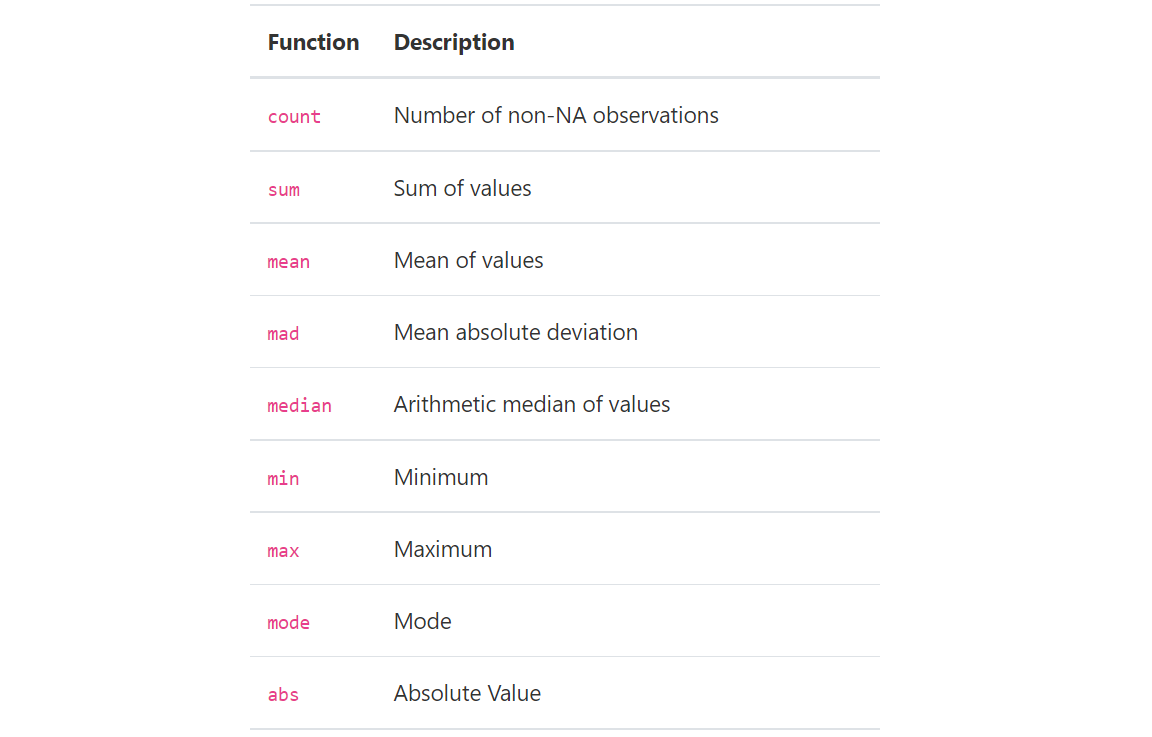

In [120]:
from IPython.display import Image
Image(filename = "C:/Users/Win 10/Pictures/DS1.png",width=500, height=500)

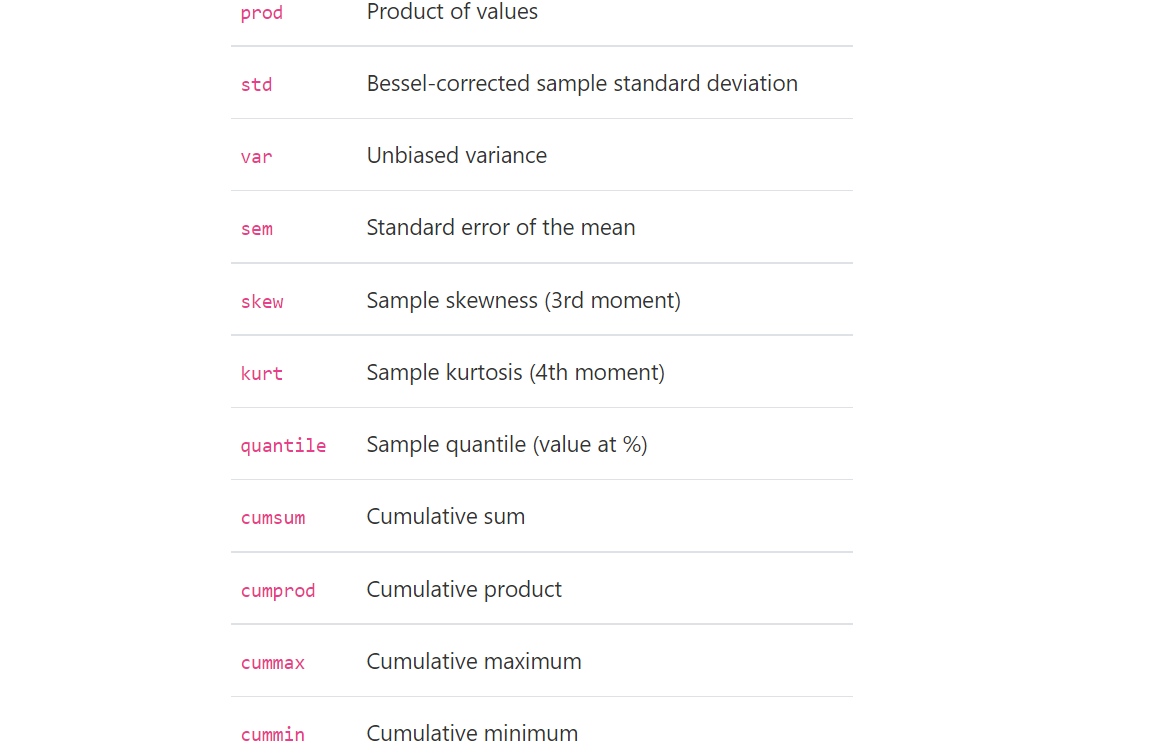

In [121]:
Image(filename = "C:/Users/Win 10/Pictures/DS2.png",width=500, height=500)

In [102]:
df1

,C,D
2021-02-10,23.319692,14.789268
2021-02-11,17.008654,19.944298
2021-02-12,26.552903,18.030387
2021-02-13,16.292625,20.367901
2021-02-14,18.438401,19.655149


In [125]:
# .describe() : the simplest, full-stack function for descriptive statistics @-@
df1.describe()

,C,D
count,5.000000,5.000000
mean,20.322455,18.557400
std,4.432053,2.284897
min,16.292625,14.789268
25%,17.008654,18.030387
50%,18.438401,19.655149
75%,23.319692,19.944298
max,26.552903,20.367901


In [ ]:
# .sum() : 0 for column, 1 for row, skipna if necessary @-@

In [105]:
df1.sum(0)

C    101.612274
D     92.787002
dtype: float64

In [106]:
df1.sum(1)

2021-02-10    38.108960
2021-02-11    36.952952
2021-02-12    44.583290
2021-02-13    36.660526
2021-02-14    38.093550
Freq: D, dtype: float64

In [ ]:
# .mean() : 0 for column, 1 for row

In [103]:
df1.mean(0)

C    20.322455
D    18.557400
dtype: float64

In [104]:
df1.mean(1)

2021-02-10    19.054480
2021-02-11    18.476476
2021-02-12    22.291645
2021-02-13    18.330263
2021-02-14    19.046775
Freq: D, dtype: float64

In [107]:
# for ex, I want to subtract each element in df by column means (CF, remembers???)
df1.sub(df1.mean(0))

,C,D
2021-02-10,2.997237,-3.768132
2021-02-11,-3.313801,1.386897
2021-02-12,6.230448,-0.527014
2021-02-13,-4.029830,1.810501
2021-02-14,-1.884054,1.097749


In [108]:
# cumsum()
# cumprod()

In [109]:
df3

,0,1,2,3,4
0,9,4,17,13,18
1,14,12,12,3,5
2,5,0,13,17,4
3,2,18,15,6,15


In [110]:
df3.cumsum(0)

,0,1,2,3,4
0,9,4,17,13,18
1,23,16,29,16,23
2,28,16,42,33,27
3,30,34,57,39,42


In [112]:
df3.cumprod(0)

,0,1,2,3,4
0,9,4,17,13,18
1,126,48,204,39,90
2,630,0,2652,663,360
3,1260,0,39780,3978,5400


##### Value counts for histogram

In [130]:
# .value_counts(): remember this is only used for 1D array of value

In [148]:
df2[2].value_counts()

3    18
7    16
9    12
6    12
8    11
5     9
0     9
4     5
2     5
1     3
Name: 2, dtype: int64

##### APPLY: ROW AND COLUMN-WISE FUNCTION

In [149]:
# .apply(func)

In [155]:
df3.columns=['A','B','C','D','E']
df3

,A,B,C,D,E
0,9,4,17,13,18
1,14,12,12,3,5
2,5,0,13,17,4
3,2,18,15,6,15


In [158]:
df3.apply(lambda x: x.max()- x.min(), axis=1)  # The range of each row

0    14
1    11
2    17
3    16
dtype: int64

In [167]:
df3.apply(lambda x: (x-x.mean())/x.std(), axis=0)  # Normalize each attribute

,A,B,C,D,E
0,0.288675,-0.558156,1.240216,0.508081,1.064213
1,1.250926,0.434122,-1.014722,-1.055246,-0.780423
2,-0.481125,-1.054295,-0.563735,1.133412,-0.922318
3,-1.058475,1.178330,0.338241,-0.586248,0.638528


In [159]:
df3.apply(lambda x: x- x.mean(), axis=1)

,A,B,C,D,E
0,-3.2,-8.2,4.8,0.8,5.8
1,4.8,2.8,2.8,-6.2,-4.2
2,-2.8,-7.8,5.2,9.2,-3.8
3,-9.2,6.8,3.8,-5.2,3.8


In [162]:
df3.apply(np.log)

,A,B,C,D,E
0,2.197225,1.386294,2.833213,2.564949,2.890372
1,2.639057,2.484907,2.484907,1.098612,1.609438
2,1.609438,-inf,2.564949,2.833213,1.386294
3,0.693147,2.890372,2.708050,1.791759,2.708050


In [163]:
df3.apply(np.sum, axis=0)

A    30
B    34
C    57
D    39
E    42
dtype: int64

In [168]:
# We can also use the string to indicate the function, amazing huh @-@
df3.apply('mean')

A     7.50
B     8.50
C    14.25
D     9.75
E    10.50
dtype: float64

##### AGGREGATION

THE QUESTION IS, THE APPLY FUNCTION CAN ONLY APPLY 1 FUNCTION, HOW TO APPLY MULTIPLE FUNCTION

In [171]:
df3.agg(['sum','mean', 'var'])

,A,B,C,D,E
sum,30.0,34.0,57.000000,39.000000,42.000000
mean,7.5,8.5,14.250000,9.750000,10.500000
var,27.0,65.0,4.916667,40.916667,49.666667


In [172]:
df3.agg([np.sum, np.mean, np.var])

,A,B,C,D,E
sum,30.0,34.0,57.000000,39.000000,42.000000
mean,7.5,8.5,14.250000,9.750000,10.500000
var,27.0,65.0,4.916667,40.916667,49.666667


In [177]:
df3.agg([np.log, np.exp],axis=0)

A                       B                       C                \
        log           exp       log           exp       log           exp   
0  2.197225  8.103084e+03  1.386294  5.459815e+01  2.833213  2.415495e+07   
1  2.639057  1.202604e+06  2.484907  1.627548e+05  2.484907  1.627548e+05   
2  1.609438  1.484132e+02      -inf  1.000000e+00  2.564949  4.424134e+05   
3  0.693147  7.389056e+00  2.890372  6.565997e+07  2.708050  3.269017e+06   

          D                       E                
        log           exp       log           exp  
0  2.564949  4.424134e+05  2.890372  6.565997e+07  
1  1.098612  2.008554e+01  1.609438  1.484132e+02  
2  2.833213  2.415495e+07  1.386294  5.459815e+01  
3  1.791759  4.034288e+02  2.708050  3.269017e+06

In [182]:
# We can also apply the functions for specific attribute @-@
df3.agg({'B':'mean', 'E': 'sum'})

B     8.5
E    42.0
dtype: float64